In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from helpers.iaml01cw2_helpers import load_CoVoST2


Xtrn,Ytrn,Xtst,Ytst = load_CoVoST2("C:\\Users\\User\\Documents\\3. Third Year\\IAML\\IAML-CW2\\data")


In [2]:
%%time

from sklearn.cluster import KMeans

kmeans = KMeans(22, random_state = 1)
kmeans.fit(Xtrn)

C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


Wall time: 9.61 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=22, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [3]:
np.round(kmeans.inertia_, 4)

38185.817

In [4]:
list(zip(*np.unique(kmeans.labels_, return_counts = True)))

[(0, 1018),
 (1, 1125),
 (2, 1191),
 (3, 890),
 (4, 1162),
 (5, 1332),
 (6, 839),
 (7, 623),
 (8, 1400),
 (9, 838),
 (10, 659),
 (11, 1276),
 (12, 121),
 (13, 152),
 (14, 950),
 (15, 1971),
 (16, 1251),
 (17, 845),
 (18, 896),
 (19, 930),
 (20, 1065),
 (21, 1466)]

In [5]:
Xmeans = []
for c in range(22):
    Xclass = Xtrn[np.where(Ytrn == c)[0]]
    Xmeans.append(Xclass.mean(0))

Xmeans = np.array(Xmeans)
Xmeans.shape

(22, 26)

In [6]:
from sklearn.decomposition import PCA

pca_mean = PCA(2)
Xmean_pca = pca_mean.fit_transform(Xmeans)
cluster_pca = pca_mean.transform(kmeans.cluster_centers_)

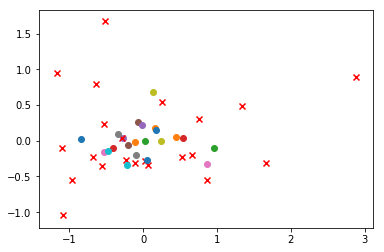

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns



for i in range(22):
    plt.scatter(*Xmean_pca[i], label = f"Language {i}")
    
    plt.scatter(*cluster_pca[i], marker = "x", c="r")
    
#plt.legend()

In [31]:
plt.scatter(Xmean_pca.transpose()[0], Xmean_pca.transpose()[1], c = "red", label = range(22))
plt.scatter(cluster_pca.transpose()[0], cluster_pca.transpose()[1], c = "blue", marker = "x")

plt.legend()

SyntaxError: invalid syntax (<ipython-input-31-7a7c84c670c1>, line 1)

In [9]:
from sklearn.mixture import GaussianMixture

In [10]:
l0_train = Xtrn[np.where(Ytrn == 0)[0]]
l0_test = Xtst[np.where(Ytst == 0)[0]]

l0_train.shape, l0_test.shape

((1001, 26), (103, 26))

In [11]:
%%time

diag_cov = []
full_cov = []
ks = (1, 3, 5, 10, 15)

for k in ks:
    diag_model = GaussianMixture(k, covariance_type = "diag")
    full_model = GaussianMixture(k, covariance_type = "full")
    
    diag_model.fit(l0_train)
    full_model.fit(l0_train)
    
    diag_cov.append((diag_model.score(l0_train), diag_model.score(l0_test)))
    full_cov.append((full_model.score(l0_train), full_model.score(l0_test)))
    
diag_cov = np.array(diag_cov).transpose()
full_cov = np.array(full_cov).transpose()

Wall time: 643 ms


Text(0,0.5,'Per-sample average log-likelihood')

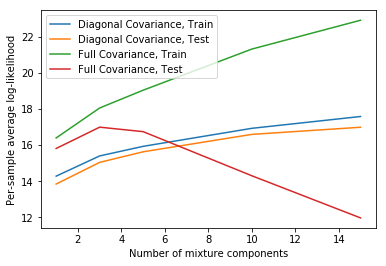

In [12]:
plt.plot(ks, diag_cov[0], label = "Diagonal Covariance, Train")
plt.plot(ks, diag_cov[1], label = "Diagonal Covariance, Test")

plt.plot(ks, full_cov[0], label = "Full Covariance, Train")
plt.plot(ks, full_cov[1], label = "Full Covariance, Test")

plt.legend()
plt.xlabel("Number of mixture components")
plt.ylabel("Per-sample average log-likelihood")

In [13]:
np.round(diag_cov, 4), np.round(full_cov, 4), 

(array([[14.2804, 15.3982, 15.9286, 16.9255, 17.5797],
        [13.8429, 15.0419, 15.6267, 16.5904, 16.9847]]),
 array([[16.3936, 18.0503, 19.0339, 21.3091, 22.9043],
        [15.8105, 16.9894, 16.7419, 14.3019, 11.9695]]))

In [14]:
full_cov

array([[16.39360044, 18.05032791, 19.03387705, 21.30912242, 22.90430253],
       [15.81051154, 16.98940223, 16.74192278, 14.30189913, 11.9694612 ]])